In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('./bank-additional-full.csv')

* `y` is the predicted variable here.

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# df=df.replace({'unknown': None})

In [5]:
df.shape

(41188, 21)

**General input attributes:**
1. age (numeric)
2. job - type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
3. marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
4. education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown") 
5. default: has credit in default? (categorical: "no","yes","unknown")
6.housing: has housing loan? (categorical: "no","yes","unknown")
7.loan: has personal loan? (categorical: "no","yes","unknown")


**Attributes: Group 2 (Last contact of the current campaign)**
1. contact: contact communication type (categorical: "cellular","telephone")
2. month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
3. day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
4. duration: last contact duration, in seconds (numeric). Important note: the duration variable is unknown before the sales call is finished

**Attributes: Group 3 (Historical Attributes)**
1. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
2. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
3. previous: number of contacts performed before this campaign and for this client (numeric)
4. poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

**Attributes: Group 4 (not available at first - socio-economic context)**
1. emp.var.rate: employment variation rate - quarterly indicator (numeric)
2. cons.price.idx: consumer price index - monthly indicator (numeric)     
3. cons.conf.idx: consumer confidence index - monthly indicator (numeric)   
4. euribor3m: euribor 3 month rate - daily indicator (numeric)
    * euribor: reference daily interest rate????
5. nr.employed: number of employees - quarterly indicator (numeric)

`y`: whether a sale has been made?

## Step 1: Exploratory Data Analysis

In [6]:
y = df["y"]

In [7]:
y.shape

(41188,)

In [8]:
df["y_num"] = df["y"].map(dict(yes=1, no=0))

In [9]:
df['y_num'].value_counts()

0    36548
1     4640
Name: y_num, dtype: int64

<AxesSubplot:xlabel='y', ylabel='count'>

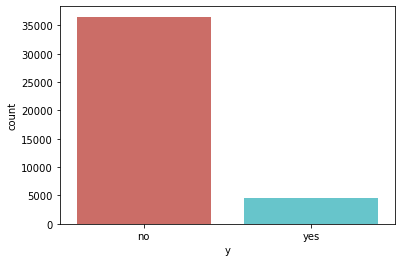

In [10]:
sns.countplot(x='y', data=df,palette='hls')

<AxesSubplot:xlabel='education', ylabel='count'>

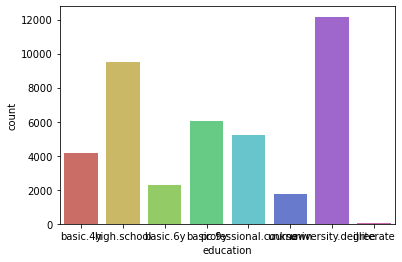

In [11]:
sns.countplot(x='education', data=df,palette='hls')

<AxesSubplot:xlabel='job', ylabel='count'>

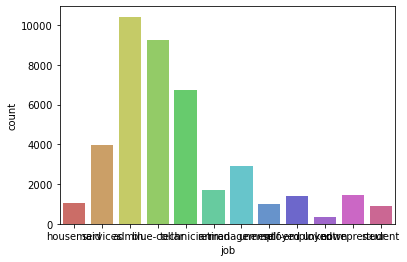

In [12]:
sns.countplot(x='job', data=df,palette='hls')

Therefore, we can actually see that this dataset is imbalanced.

In [13]:
df.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_num
y,,,,,,,,,,,
no,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600,0.0
yes,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991,1.0


Observations:
* age: yes > no (just a little bit)
* Duration for yes is significantly higher.
* campaign: lower for yes group. 
* pdays: lower for yes group.

In [14]:
# Categorical Means
df.groupby('job').mean()
# student and retired has a higher y_num.

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_num
job,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


In [15]:
df.groupby('marital').mean()
# no significant difference among different marital statuses. 

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_num
marital,,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772,0.101573
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313037,5157.393750,0.150000


In [16]:
df.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_num
education,,,,,,,,,,,
basic.4y,47.596504,264.827826,2.600575,965.704981,0.147031,0.215924,93.658309,-40.239871,3.751768,5170.124880,0.102490
basic.6y,40.448953,264.414485,2.556283,980.368237,0.129145,0.231152,93.650062,-41.127880,3.772942,5174.718063,0.082024
basic.9y,39.061208,261.291811,2.532341,979.133168,0.141439,0.159239,93.623399,-41.326749,3.697963,5172.294012,0.078246
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298,0.137245
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509,0.145003


### Question 1a:
* Load the data 
* Check for linear correlations between teh input variables
* Detect Colinarity (relevant to numeric variables only).

In [17]:
corr_df = df.corr()
print(corr_df)

                     age  duration  campaign     pdays  previous  \
age             1.000000 -0.000866  0.004594 -0.034369  0.024365   
duration       -0.000866  1.000000 -0.071699 -0.047577  0.020640   
campaign        0.004594 -0.071699  1.000000  0.052584 -0.079141   
pdays          -0.034369 -0.047577  0.052584  1.000000 -0.587514   
previous        0.024365  0.020640 -0.079141 -0.587514  1.000000   
emp.var.rate   -0.000371 -0.027968  0.150754  0.271004 -0.420489   
cons.price.idx  0.000857  0.005312  0.127836  0.078889 -0.203130   
cons.conf.idx   0.129372 -0.008173 -0.013733 -0.091342 -0.050936   
euribor3m       0.010767 -0.032897  0.135133  0.296899 -0.454494   
nr.employed    -0.017725 -0.044703  0.144095  0.372605 -0.501333   
y_num           0.030399  0.405274 -0.066357 -0.324914  0.230181   

                emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
age                -0.000371        0.000857       0.129372   0.010767   
duration           -0.027968       

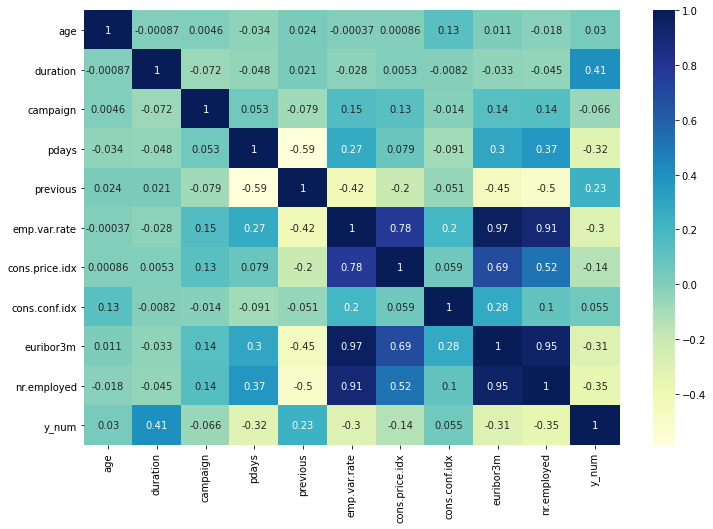

In [18]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_df, annot=True,cmap="YlGnBu")
plt.show()

In [19]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'y_num'],
      dtype='object')

In [20]:
df_no4 = df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome','y', 'y_num']]

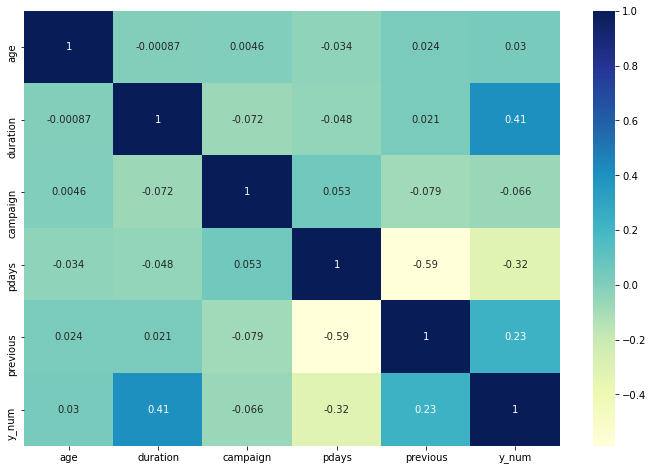

In [21]:
plt.figure(figsize=(12,8))
sns.heatmap(df_no4.corr(), annot=True,cmap="YlGnBu")
plt.show()

From the heatmap, we can observe that:
* `emp.var.rate` and `nr.employed` are collinear.
* `emp.var.rate` and `euribor3m` are collinear.
* `euribor3m` and `nr.employed` are collinear.
(Note: we need consider the criterion for strong linear correlation: > 0.8?)
* `emp.var.rate` and `cons.pric.idx` are collinear (?)

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [23]:
X = df.select_dtypes(exclude='object').iloc[:,:-1]

In [24]:
X.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [134]:
calc_vif(X).set_index("variables").transpose()

variables,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
VIF,16.047296,2.011044,1.921499,44.413175,2.001464,28.910219,22561.123124,120.086975,226.237349,26746.634212


In [26]:
Y = df_no4.select_dtypes(exclude='object').iloc[:,:-1]

In [135]:
calc_vif(Y).set_index("variables").transpose()

variables,age,duration,campaign,pdays,previous
VIF,11.807026,1.948872,1.85228,11.817344,1.239496


### Question 1b:
* Some of the variables exhibit missing values. Purpose at least 2 ways to handle missing values and apply one of your suggestions to deal with missing data.

Indicator variables for missingness of categorical predictors.:For unordered categorical predictors, a simple and often useful approach to imputation is to add an
extra category for the variable indicating missingness.

Some possible solutions:
* fill these variables with the string with the most occurance.
* add another column indicating missing values(binary), and then replace the missing value with its mode. 

In [136]:
df_copy = df.copy()

In [137]:
df_copy=df_copy.replace({'unknown': None})

In [139]:
df_copy.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
y_num                0
dtype: int64

### Question 1c:
* Use cross-tabulation analysis to test the dependency of different variables on the target variable (y)
* Which of the variables seem to influence the target variable?
* Use categorical only

In [29]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
y_num               int64
dtype: object

In [30]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_num
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [31]:
df['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
20         1
25         1
26         1
27         1
Name: pdays, dtype: int64

<AxesSubplot:>

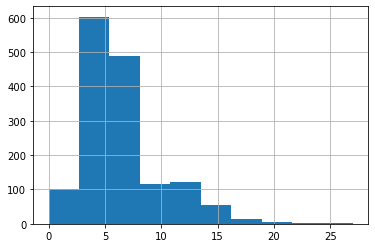

In [32]:
df.loc[df['pdays']!=999]['pdays'].hist()

<AxesSubplot:>

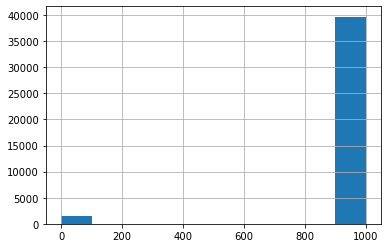

In [33]:
df['pdays'].hist()

In [34]:
df_cat = df.select_dtypes(include=['object'])

In [35]:
df_cat.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


In [36]:
df_cat['y'] = y

<ipython-input-36-476c949f7b71>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['y'] = y


In [37]:
df_cat.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


In [96]:
pd.crosstab(index= df_cat['job'],
           columns=df_cat['y']).transpose()

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
y,,,,,,,,,,,,
no,9070,8616,1332,954,2596,1286,1272,3646,600,6013,870,293
yes,1352,638,124,106,328,434,149,323,275,730,144,37


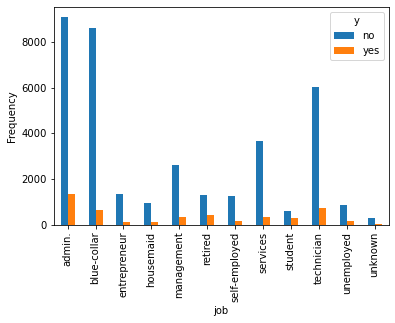

In [39]:
pd.crosstab(df['job'],df['y']).plot(kind='bar')
plt.ylabel('Frequency')
plt.show()

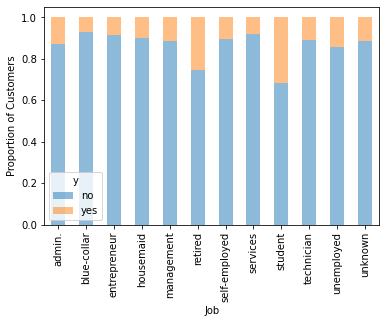

In [40]:
table=pd.crosstab(df.job,df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, alpha=0.5)
plt.xlabel('Job')
plt.ylabel('Proportion of Customers')
plt.show()

`Job Title` can be a good predictor.

In [41]:
pd.crosstab(index= df_cat['job'],
           columns=df_cat['y'],
           normalize="index")

y,no,yes
job,,
admin.,0.870274,0.129726
blue-collar,0.931057,0.068943
entrepreneur,0.914835,0.085165
housemaid,0.900000,0.100000
management,0.887825,0.112175
retired,0.747674,0.252326
self-employed,0.895144,0.104856
services,0.918619,0.081381
student,0.685714,0.314286


In [97]:
pd.crosstab(index= df_cat['marital'],
           columns=df_cat['y']).transpose()

marital,divorced,married,single,unknown
y,,,,
no,4136,22396,9948,68
yes,476,2532,1620,12


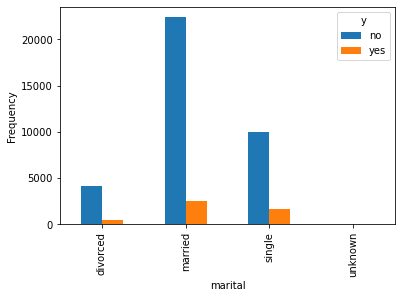

In [43]:
pd.crosstab(df['marital'],df['y']).plot(kind='bar')
plt.ylabel('Frequency')
plt.show()

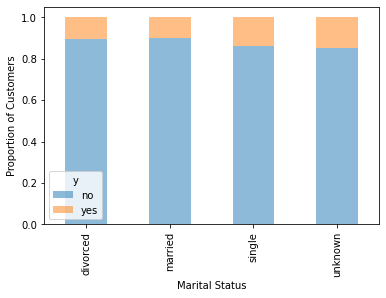

In [44]:
table=pd.crosstab(df.marital,df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, alpha=0.5)
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.show()

In [98]:
pd.crosstab(index= df_cat['education'],
           columns=df_cat['y']).transpose()

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
y,,,,,,,,
no,3748,2104,5572,8484,14,4648,10498,1480
yes,428,188,473,1031,4,595,1670,251


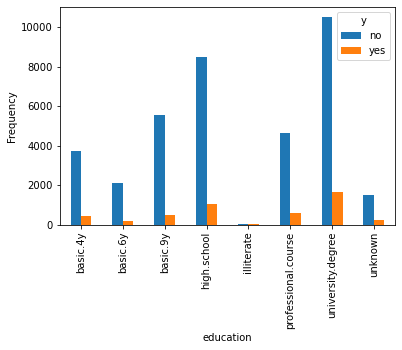

In [46]:
pd.crosstab(df['education'],df['y']).plot(kind='bar')
plt.ylabel('Frequency')
plt.show()

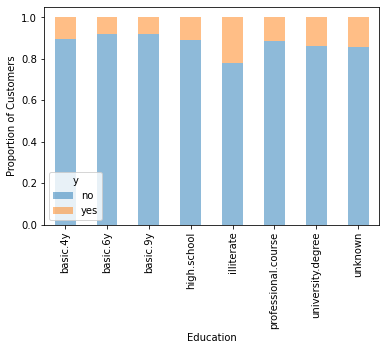

In [47]:
table=pd.crosstab(df.education,df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, alpha=0.5)
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.show()

`Education` is considered as a good predictor variable.

In [100]:
pd.crosstab(index= df_cat['default'],
           columns=df_cat['y']).transpose()

default,no,unknown,yes
y,,,
no,28391,8154,3
yes,4197,443,0


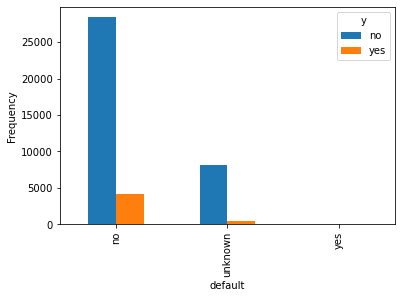

In [49]:
# default: has credit in default?
pd.crosstab(df['default'],df['y']).plot(kind='bar')
plt.ylabel('Frequency')
plt.show()

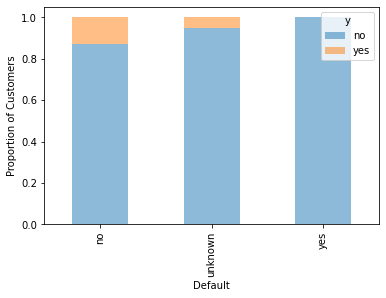

In [50]:
table=pd.crosstab(df.default,df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, alpha=0.5)
plt.xlabel('Default')
plt.ylabel('Proportion of Customers')
plt.show()

`Default` also seems to be a good predictor variable. 

In [101]:
pd.crosstab(index= df_cat['housing'],
           columns=df_cat['y']).transpose()

housing,no,unknown,yes
y,,,
no,16596,883,19069
yes,2026,107,2507


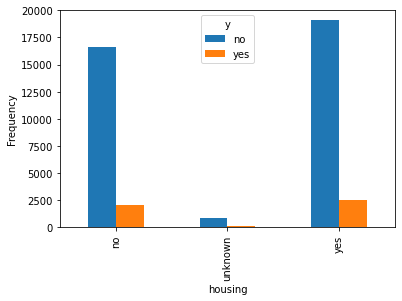

In [52]:
pd.crosstab(df['housing'],df['y']).plot(kind='bar')
plt.ylabel('Frequency')
plt.show()

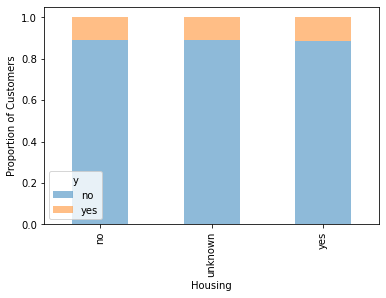

In [53]:
table=pd.crosstab(df.housing,df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, alpha=0.5)
plt.xlabel('Housing')
plt.ylabel('Proportion of Customers')
plt.show()

In [102]:
pd.crosstab(index= df_cat['loan'],
           columns=df_cat['y']).transpose()

loan,no,unknown,yes
y,,,
no,30100,883,5565
yes,3850,107,683


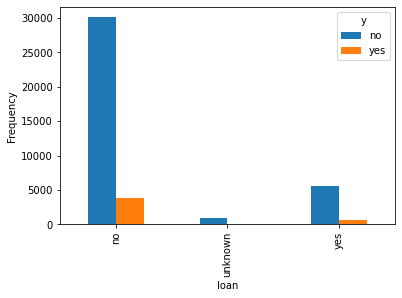

In [55]:
pd.crosstab(df['loan'],df['y']).plot(kind='bar')
plt.ylabel('Frequency')
plt.show()

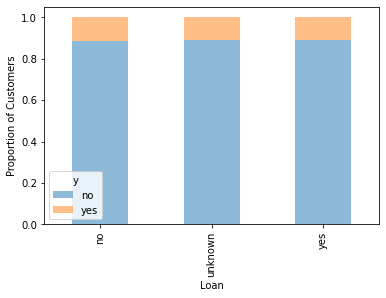

In [56]:
table=pd.crosstab(df.loan,df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, alpha=0.5)
plt.xlabel('Loan')
plt.ylabel('Proportion of Customers')
plt.show()

In [103]:
pd.crosstab(index= df_cat['contact'],
           columns=df_cat['y']).transpose()

contact,cellular,telephone
y,,
no,22291,14257
yes,3853,787


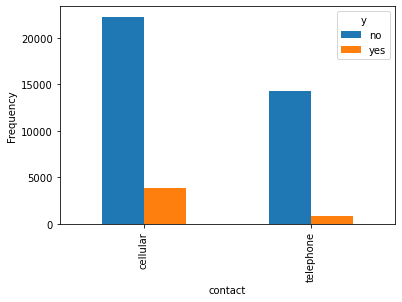

In [58]:
pd.crosstab(df['contact'],df['y']).plot(kind='bar')
plt.ylabel('Frequency')
plt.show()

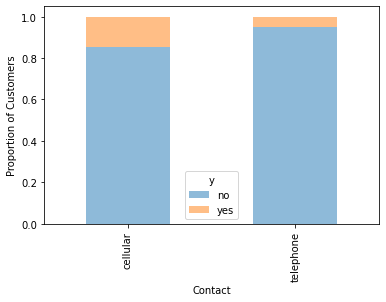

In [59]:
table=pd.crosstab(df.contact,df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, alpha=0.5)
plt.xlabel('Contact')
plt.ylabel('Proportion of Customers')
plt.show()

`Contact` is also a potential good predictor variable.

In [105]:
from calendar import month_abbr

In [108]:
pd.crosstab(index= df_cat['month'],
           columns=df_cat['y']).transpose().reindex(columns=['mar','apr','may','jun','jul','aug','sep','oct','nov','dec'])

month,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
y,,,,,,,,,,
no,270,2093,12883,4759,6525,5523,314,403,3685,93
yes,276,539,886,559,649,655,256,315,416,89


In [109]:
table = pd.crosstab(index= df_cat['month'],
           columns=df_cat['y']).transpose().reindex(columns=['mar','apr','may','jun','jul','aug','sep','oct','nov','dec'])

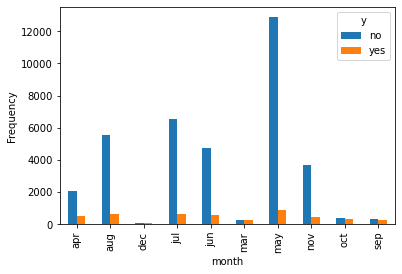

In [61]:
pd.crosstab(df['month'],df['y']).plot(kind='bar')
plt.ylabel('Frequency')
plt.show()

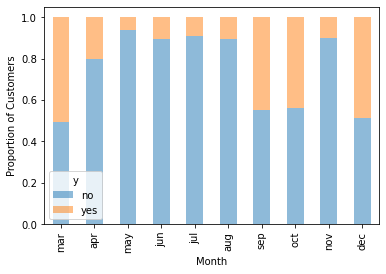

In [125]:
table=pd.crosstab(df.month,df.y)
table.div(table.sum(1).astype(float), axis=0).loc[['mar','apr','may','jun','jul','aug','sep','oct','nov','dec']].plot(kind='bar', stacked=True, alpha=0.5)
plt.xlabel('Month')
plt.ylabel('Proportion of Customers')
plt.show()

`Month` can definitely be one of the good indicators.

In [127]:
pd.crosstab(index= df_cat['day_of_week'],
           columns=df_cat['y']).transpose().reindex(columns=["mon","tue","wed","thu","fri"])

day_of_week,mon,tue,wed,thu,fri
y,,,,,
no,7667,7137,7185,7578,6981
yes,847,953,949,1045,846


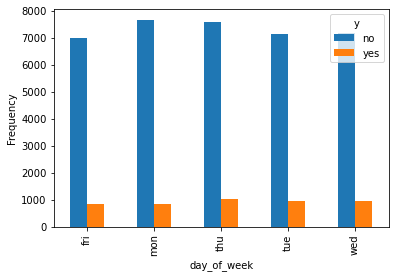

In [64]:
pd.crosstab(df['day_of_week'],df['y']).plot(kind='bar')
plt.ylabel('Frequency')
plt.show()

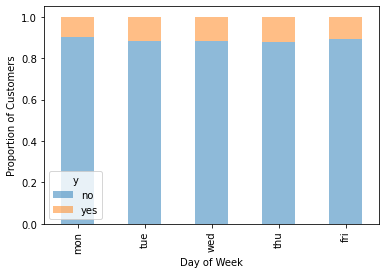

In [128]:
table=pd.crosstab(df.day_of_week,df.y)
table.div(table.sum(1).astype(float), axis=0).loc[["mon","tue","wed","thu","fri"]].plot(kind='bar', stacked=True, alpha=0.5)
plt.xlabel('Day of Week')
plt.ylabel('Proportion of Customers')
plt.show()

In [129]:
pd.crosstab(index= df_cat['poutcome'],
           columns=df_cat['y']).transpose()

poutcome,failure,nonexistent,success
y,,,
no,3647,32422,479
yes,605,3141,894


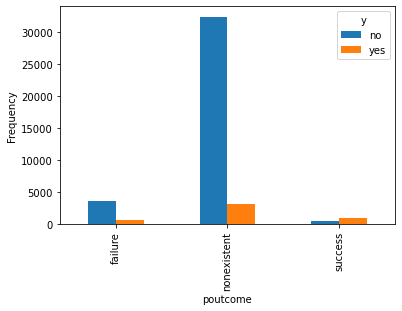

In [67]:
pd.crosstab(df['poutcome'],df['y']).plot(kind='bar')
plt.ylabel('Frequency')
plt.show()

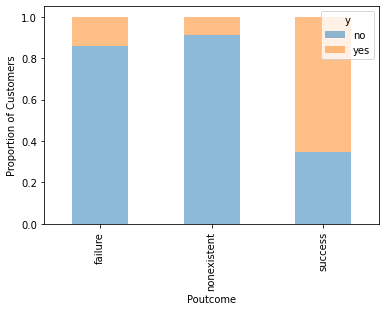

In [68]:
table=pd.crosstab(df.poutcome,df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, alpha=0.5)
plt.xlabel('Poutcome')
plt.ylabel('Proportion of Customers')
plt.show()

`poutcome`:outcome of previous marketing campaign.
This also seem to be a good predictor variable.

### Question 1d:
* Which of the three groups of input variables (Group 1 - Group 3) do you find the most useful explaining y based on your analysis so far

Some thoughts:
* On the numerical heatmap, the only variable that has significant effect will be `duration`.
* On the categorical variable side, refer to the crosstab analysis.

## Step 2: Predictive Modeling

### Question 2a:
* Fit a suitable model (from the model we've learned in class) to predict the target variable `y`.
* Explain your choice (what model is most suitable? Why?)
* Note that you are not limited to main effects (you may apply functions to input variables and consider interactions between variables)

Models covered so far:
* Linear Regression
    * require all variables to be numerical - convert categorical variables into ordinal or dummy variables? 
    * not suitable for classification tasks.
* Logisitic Regression
    * we need to group numerical variables if we want to use logistic regressions.
* Cluster Analysis (K-means)
    * do not handle string data.
* MDS

Q: can we include group 4 variables in this prediction?

In [69]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'y_num'],
      dtype='object')

In [70]:
df_group1 = df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan','y_num']]

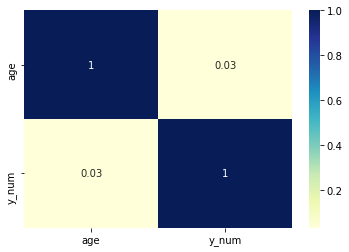

In [71]:
sns.heatmap(df_group1.corr(), annot=True,cmap="YlGnBu")
plt.show()

In [72]:
df_group1.head()

,age,job,marital,education,default,housing,loan,y_num
0,56,housemaid,married,basic.4y,no,no,no,0
1,57,services,married,high.school,unknown,no,no,0
2,37,services,married,high.school,no,yes,no,0
3,40,admin.,married,basic.6y,no,no,no,0
4,56,services,married,high.school,no,no,yes,0


In [73]:
df_group2 = df[['contact', 'month', 'day_of_week', 'duration','y_num']]

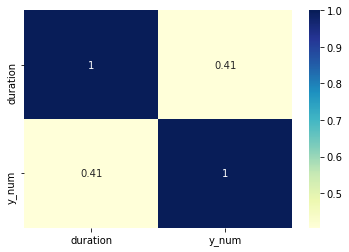

In [74]:
# plt.figure(figsize=(12,8))
sns.heatmap(df_group2.corr(), annot=True,cmap="YlGnBu")
plt.show()

In [75]:
df_group3 = df[['campaign', 'pdays','previous', 'poutcome']]

In [76]:
df_group4 = df[['emp.var.rate', 'cons.price.idx','cons.conf.idx', 'euribor3m', 'nr.employed','y_num']]

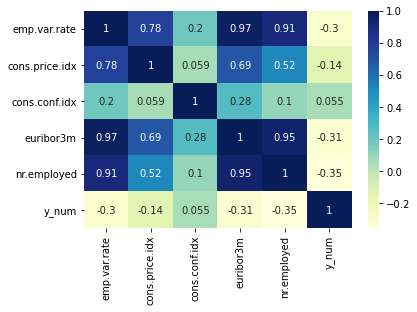

In [77]:
# plt.figure(figsize=(12,8))
sns.heatmap(df_group4.corr(), annot=True,cmap="YlGnBu")
plt.show()

### Logistic Regression

In [78]:
df_cat = df.select_dtypes(include=['object'])

In [79]:
list(df_cat.columns)[:-1]

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [80]:
for var in list(df_cat.columns)[:-1]:
    cat_list = 'var'+'_'+var
    cat_list = pd.get_dummies(df[var], prefix=var)
    df_dum = df.join(cat_list)
    
data_vars = df_dum.columns.values.tolist()
to_keep=[i for i in data_vars if i not in list(df_cat.columns)[:-1]]

In [81]:
df_dum = df_dum[to_keep]

In [82]:
df_dum.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'y_num', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success'],
      dtype='object')

Since this dataset is imbalanced, should we do undersampling???
* if do, we can undersampling through SMOTE

Another question here: 
* should we do a train_test_split?
* if not, we might need to switch back to jmp for this logistic regression. 

In [83]:
df_copy = df.copy()

In [84]:
pd.isnull(df_copy)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_num
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41184,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41185,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41186,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [85]:
df_copy[df_copy.isnull().any(axis=1)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_num


In [86]:
len(df_copy[df_copy.isnull().any(axis=1)].index.tolist())

0

In [87]:
missing_idx = df_copy[df_copy.isnull().any(axis=1)].index.tolist()

In [88]:
missing = [1]*len(df_copy)

In [89]:
for idx in missing_idx:
    missing[idx] = 0

In [90]:
df_copy['Missing_data'] = missing

In [91]:
df_copy.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_num,Missing_data
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,1
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,1
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,1
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,1
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,1


In [92]:
df_copy['Missing_data'].value_counts()

1    41188
Name: Missing_data, dtype: int64

In [93]:
df_group1.mode()

,age,job,marital,education,default,housing,loan,y_num
0,31,admin.,married,university.degree,no,yes,no,0
